In [1]:
import io
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path
import pandas as pd
import pickle
import PIL
import torch
import torchvision
import urllib
import warnings
import sys

sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..'))
from attacks import eot_attack_evaluator
from attacks import eot_attacks
from attacks import utils
from utils import labels_util

# Disable annoying UserWarning caused by using nn.Upsample
# in the relighting model.
warnings.filterwarnings("ignore", category=UserWarning) 

%load_ext autoreload
%autoreload 2

/home/jupyter/project-1/experiments
/home/jupyter/project-1


# I. PubFig10 + FaceNet + [multiilum | DPR] evaluation

## I.a. Pretrained classifier

In [2]:
pubfig_configs = [
{
    'dataset': 'pubfig10',
    'dataset_mode': 'test',
    'classif_model_name': 'pubfig_facenet',
    'classif_mode': 'normal_pretrained',
    'relight_model_name': 'multi_illumination_murmann',
    
    'relight_checkpoint_path': '../relighters/multi_illumination/'\
                               'checkpoints/relight/epoch_13.pth',
    'relighter_eps': 1e-4,
    'learning_rate': 0.02, 
    'num_iterations': 5, 
    'gamma': 1.4, 
    'epses': [0.1],
    'attack_type': 'class_constrained_eot',
    'targets': [1, 3],     # eg: [0, 8] Target: 'Aaron Eeckhart' for everyone besides himself, otherwise 'Quincy Jones'
    'debugging': False,
},
{
    'dataset': 'pubfig10',
    'dataset_mode': 'test',
    'classif_model_name': 'pubfig_facenet',
    'classif_mode': 'normal_pretrained',
    'relight_model_name': 'dpr',
    
    'relight_checkpoint_path': '../relighters/DPR/trained_model/trained_model_03.t7',
    'learning_rate': 0.02, 
    'num_iterations': 5, 
    'epses': [0.1],
    'attack_type': 'class_constrained_eot',
    'targets': [1, 3],
    'debugging': False,

},
]

Loading pretrained model!
Training FaceNet on PubFig10
Loss: 4.416989326477051
Loss: 3.0674660205841064
Loss: 1.9182120561599731
Loss: 1.0724443197250366
Loss: 0.5716734528541565
Loss: 0.31933173537254333
Loss: 0.19770081341266632
Loss: 0.13704238831996918
Loss: 0.10469187051057816
Loss: 0.0860864594578743
Loss: 0.07456889003515244
Loss: 0.06693384796380997
Loss: 0.06154981628060341
Loss: 0.057539403438568115
Loss: 0.054407328367233276
Loss: 0.05186127871274948
Loss: 0.049721382558345795
Loss: 0.0478716604411602
Loss: 0.046235714107751846
Loss: 0.04476075619459152
Loss: 0.04340910539031029
Loss: 0.042153600603342056
Loss: 0.040974292904138565
Loss: 0.039856184273958206
Loss: 0.038788214325904846
Loss: 0.03776144981384277
Loss: 0.03677068278193474
Loss: 0.03581126034259796
Loss: 0.034880708903074265
Loss: 0.03397712856531143
Loss: 0.033099595457315445
Loss: 0.03224676474928856
Loss: 0.03141796216368675
Loss: 0.030612453818321228
Loss: 0.029829541221261024
Loss: 0.02906881831586361
Loss:

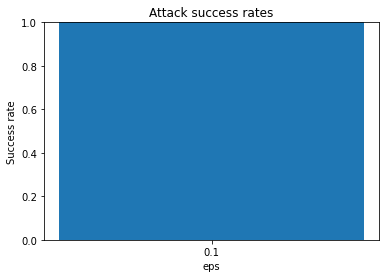

Loading pretrained model!


FileNotFoundError: [Errno 2] No such file or directory: '../models/facenet_model_pubfig10.pth'

In [3]:
for config in pubfig_configs:
    ev = eot_attack_evaluator.AttackEvaluator(config, '_results_last.csv')
    ev.evaluate()

## I. b. Adversarially trained classifier

In [ ]:
adv_pubfig_config = {
    'dataset': 'pubfig10',
    'dataset_mode': 'test',
    'classif_model_name': 'pubfig_facenet',
    
    # Difference! This time we evaluate a classifier that is adversarially trained on the spot.
    'classif_mode': 'adversarial_train',     
    'relight_model_name': 'dpr',
    
    'relight_checkpoint_path': '../relighters/DPR/trained_model/trained_model_03.t7',
    'learning_rate': 0.02, 
    'num_iterations': 5, 
    'epses': [0.1],
    'attack_type': 'class_constrained_eot',
    'targets': [1, 3],
    'debugging': False,

}

ev = eot_attack_evaluator.AttackEvaluator(adv_pubfig_config, '_results_adv.csv')
ev.evaluate()

# II. ResNet + Indoor Scenes + multiilum (TBD)

In [ ]:
indoor_configs = [
{
    'dataset': 'indoor_scenes',
    'dataset_mode': 'test',
    'classif_model_name': 'resnet_indoor',
    'classif_mode': 'normal_pretrained',
    'relight_model_name': 'multi_illumination_murmann',
    
    
    'relight_checkpoint_path': '../relighters/multi_illumination/'\
                               'checkpoints/relight/epoch_13.pth',
    
    # Relighter-specific constant.
    'relighter_eps': 1e-4,
    
    # Learning rate for attack gradient descent.
    'learning_rate': 0.05, 
    
    # Number of gradient descent iterations in the attack.
    'num_iterations': 5, 
    
    # Gamma correction constant for the multi_illumination relighter.
    'gamma': 1.3,
    
    # Radius of ball of inf-norm of allowed perturbations.
    'epses': [0.001, 0.005, 0.01],
    
    # Constrain the perturbed image to be in the same class as
    # the original image.
    'attack_type': 'class_constrained_eot',
    
    # Target label is 9 (warehouse) for all non-warehouse images, otherwise 0 (airport)
    'targets': [9, 0],
    
    'debugging': False,
},
]